# Libraries
* Execute this cell before going any further.

In [1]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sympy as sp

<br/><br/>

# Warmup

## Plotting Surfaces
The ability to visualize functions in three dimensions is a powerful tool, and Python makes this a simple task. You've encountered these plots in previous assignments. Now it's your turn to create your own!

### CODE
* Run the example code to generate a 3D plot of a standing wave.
* Create your own plot using a different function.

In [2]:
# Define symbolic variables
# x, y = sp.symbols('x y')

# Define a function using them
# f = sp.sin(x) * sp.cos(y)

# Convert to a numerical function using sp.lambdify
# f_function = sp.lambdify((x, y), f, 'numpy') 
# we can call this in our routines now to evaluate z for x and y

In [3]:
# creating a grid of points

# Define the range of points to evalutate for x and y
# x_vals = np.linspace(-np.pi, np.pi, 100)
# y_vals = np.linspace(-np.pi, np.pi, 100)

# Create a meshgrid
# X, Y = np.meshgrid(x_vals, y_vals)

# Compute function values
# Z = f_function(X, Y)

In [4]:
# Create a 3D figure
# fig = plt.figure(figsize=(4, 4))
# ax = fig.add_subplot(111, projection='3d')

# Plot the surface
# ax.plot_surface(X, Y, Z, cmap='viridis')

# Labels and title
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('f(x, y)')
# ax.set_title('sin(x)cos(y)')
# plt.tight_layout()

# plt.show()


In [5]:
# now you try - create and visualize another function!

<br/><br/>
<br/><br/>

# Magnetism and Angular Momentum

## Magnetism in the Bohr Model
The Bohr model was a significant early attempt to describe atomic structure using quantization. The model treats electrons as orbiting the nucleus only in circular paths with discrete angular momenta, $L = n\hbar$, where L is angular momentum, $\hbar$ is the reduced planck constant, $\frac{h}{2\pi}$, and $n = 1,2,3,…$  

We can derive the orbital magnetic dipole moment of a Bohr hydrogen atom using classical electromagnetism [1]. A current loop produces a magnetic dipole moment given by $\mu = IA$, where $I$ is the current and $A$ is the area of the loop. For an electron in a circular Bohr orbit with radius $r$, velocity $v$, charge $e$, and orbital period $T$:
$$
I = -e/T    
$$
$$
T = 2\pi{}r/v  
$$
$$
A = \pi{}r^2   
$$
$$
L = m_evr
$$
Combining these expressions:
$$
\mu = -\frac{e}{2\pi{}r/v}\pi{}r^2 = -\frac{evr}{2} = -\frac{e}{2m_e}L
$$
Classically, the potential energy of an object with a magnetic dipole in a magnetic field B is given by $ U = -\vec{\mu} \cdot \vec{B}$, which gives us the following expression for the energy of an electron in a magnetic field:
$$
U = \frac{e}{2m_e}\vec{L} \cdot \vec{B}
$$
This gives us an equation that can be generalized to real atomic orbitals, which do not have a clearly defined radius but do have a clearly defined angular momentum in the z-direction.

### CODE
* Using sympy, create the function that gives the potential energy of the interaction between a Bohr electron and an external magnetic field.
* Use atomic units - in this system, $e$ and $m_e$ are both equal to 1 and you do not need to include them in your equation.
* Use scalar quantities for $L$ and $B$ - assume both are aligned with the $z$-axis.
* Make a three dimensional plot which shows $U$ as a function of $L$ and $B$.

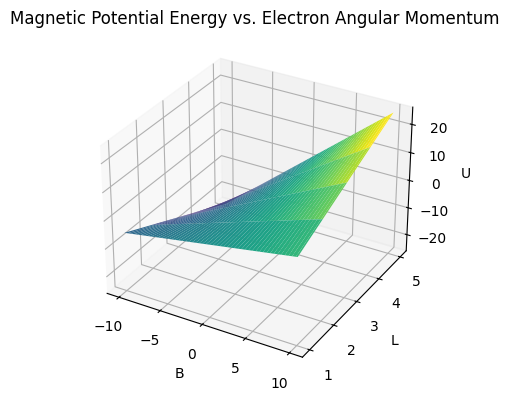

In [12]:
U, L, B = sp.symbols('U L B')

magnetic_energy_formula = 1/2 * L * B
magnetic_energy_function = sp.lambdify((L,B),magnetic_energy_formula,'numpy')

# Define the range of points to evalutate for x and y
L_vals = np.arange(1,6)
B_vals = np.linspace(-10, 10, 100)

# Create a meshgrid
L, B = np.meshgrid(L_vals, B_vals)

# Compute function values
U = magnetic_energy_function(L, B)

# Create a 3D figure 
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111, projection='3d')

#plotting the grid we made
ax.plot_surface(B,L, U, cmap='viridis')
# show the plot# Create a 3D figure


# Labels and title
ax.set_xlabel('B')
ax.set_ylabel('L')
ax.set_zlabel('U')
ax.set_title('Magnetic Potential Energy vs. Electron Angular Momentum')
plt.tight_layout()
plt.show()

### SHORT RESPONSE QUESTIONS
1. From the graph you made, describe the relationship between $U$, $L$, and $B$.
2. Why are we able to generalize this equation we derived using the Bohr model to quantum mechanical treatment of electrons?
### ANSWERS

1. The degree of splitting increases when L and B are larger; the potential energy is positive when L and B have the same sign and negative otherwise.
2. We can generalize this equation because it depends on angular momentum, electron charge, and mass, and not on radius; all of these are clearly defined for an electron's wavefunction

<br/><br/>

## Zeeman Splitting
In the previous activity, we derived angular momentum wavefunctions by solving the Schrödinger equation for a rotating system. Atomic orbitals follow the same angular wavefunctions as the rigid rotor but also include a radial component that depends on 
$r$. Since this radial dependence does not affect magnetism, we can focus solely on the angular part, given by the spherical harmonics:
$$
Y_J^m(\theta,\phi)
$$
While we've explored the orbital solutions visually, another model— the vector model—can provide more intuition for the effects of magnetism. The spherical harmonics depend on two quantum numbers, $l$ and $m_l$, which are related to angular momentum by
$$
L_{tot} = \sqrt{l(l+1)}\hbar, \hspace{0.5cm}  L_z = m_l\hbar{}
$$

Due to the uncertainty principle, only one component of angular momentum can be precisely known at a time. By convention, we choose the $z$-axis, aligned with an external magnetic or electric field. The remaining angular momentum is distributed between the $x$- and $y$-axes, which we visualize as precession around a cone.

Last week, we showed that orbitals with the same $l$ are degenerate, meaning they share the same energy. But what happens when a magnetic field is introduced? The field interacts with the magnetic moment associated with angular momentum, lifting this degeneracy—a phenomenon known as Zeeman splitting.

### Libraries
* Execute this cell before going any further.

In [7]:
from matplotlib import cm
from scipy.special import sph_harm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

### GIVEN FUNCTIONS
* Execute the blocks containing the given functions. Don't modify these.

In [8]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        return np.min(zs)

In [9]:
def zeeman_plot(l, ml, B):
    """
    Plot the orbital representation and vector model of angular momentum
    with Zeeman splitting in a magnetic field.
    
    Parameters:
    l (int): Angular momentum quantum number
    ml (int): Magnetic quantum number
    B (float): Magnetic field strength in Tesla
    """
    # Constants
    # spherical harmonic functions adapted from schrodingers-snake repo on github
    mu_B = 9.274e-24  # Bohr magneton in J/T
    hbar = 1.05457e-34  # Reduced Planck constant in J·s
    
    # Energy calculation for Zeeman splitting
    E_zeeman = -ml * mu_B * B

    mu_z = -ml * mu_B
    
    # Create figure with two subplots
    fig = plt.figure(figsize=(14, 6))
    
    # Orbital representation (left subplot)
    ax1 = fig.add_subplot(121, projection='3d')
    
    # Calculate spherical harmonics
    thetas = np.linspace(0, np.pi, 100)
    phis = np.linspace(0, 2 * np.pi, 100)
    Theta, Phi = np.meshgrid(thetas, phis)
    s_harm = sph_harm(ml, l, Phi, Theta)
    
    # Calculate radius and cartesian coordinates
    R = np.abs(s_harm)
    X = R * np.sin(Theta) * np.cos(Phi)
    Y = R * np.sin(Theta) * np.sin(Phi)
    Z = R * np.cos(Theta)
    
    # Phase coloring
    phase = np.angle(s_harm)
    phase_norm = (phase + np.pi) / (2 * np.pi)
    cmap = cm.hsv
    colors = cmap(phase_norm)
    
    # Plot orbital surface
    surf = ax1.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                           facecolors=colors, linewidth=0, 
                           antialiased=False, alpha=0.8)
    
    # Add magnetic field direction    
    if B != 0:
        field_arrow = Arrow3D([0, 0], [0, 0], [0, B*0.1667], mutation_scale=20, 
                           lw=2, arrowstyle="-|>", color="blue")
        ax1.add_artist(field_arrow)
        ax1.text(0, 0, (B+0.2)*0.1667, "B", color='blue', fontsize=14, ha='center')
    
    
    # Set axis limits and labels
    ax1.set_box_aspect([1, 1, 1])
    max_val = 1.2 * np.max([np.max(np.abs(X)), np.max(np.abs(Y)), np.max(np.abs(Z))])
    ax1.set_xlim(-0.5, 0.5)
    ax1.set_ylim(-0.5, 0.5)
    ax1.set_zlim(-0.5, 0.5)
    
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('z')
    ax1.set_title(f'Orbital Representation (l={l}, ml={ml})')
    
    # Vector model representation (right subplot)
    ax2 = fig.add_subplot(122, projection='3d')
    
    # Calculate angular momentum values
    L_tot = np.sqrt(l * (l + 1))
    L_z = ml
    
    # Calculate cone angle
    if L_tot > 0:
        theta_cone = np.arccos(L_z / L_tot)
    else:
        theta_cone = 0
    
    # Draw z-axis
    ax2.plot([0, 0], [0, 0], [-1.5, 1.5], 'k--', alpha=0.3)
    
    # Draw magnetic field direction
    if B != 0:
        
        field_arrow = Arrow3D([0, 0], [0, 0], [0, B], mutation_scale=20, 
                           lw=2, arrowstyle="-|>", color="blue")
        ax2.add_artist(field_arrow)
        ax2.text(0, 0, B+0.2, "B", color='blue', fontsize=14, ha='center')
    
    # Draw angular momentum vector
    if L_tot > 0:
        # Cone base circle
        phi = np.linspace(0, 2*np.pi, 100)
        L_xy = L_tot * np.sin(theta_cone)
        x_cone = L_xy * np.cos(phi)
        y_cone = L_xy * np.sin(phi)
        z_cone = np.ones_like(phi) * L_z
        ax2.plot(x_cone, y_cone, z_cone, 'r-', alpha=0.3)
        
        # Draw cone surface
        for phi_val in np.linspace(0, 2*np.pi, 20):
            x_line = [0, L_xy * np.cos(phi_val)]
            y_line = [0, L_xy * np.sin(phi_val)]
            z_line = [0, L_z]
            ax2.plot(x_line, y_line, z_line, 'k-', alpha=0.1)
        
        # Draw L vector (random position on the cone)
        phi_L = np.random.random() * 2 * np.pi
        L_x = L_xy * np.cos(phi_L)
        L_y = L_xy * np.sin(phi_L)
        L_arrow = Arrow3D([0, L_x], [0, L_y], [0, L_z],
                          mutation_scale=20, lw=2, arrowstyle="-|>", color="red")
        ax2.add_artist(L_arrow)
        
        # Draw Lz vector
        Lz_arrow = Arrow3D([0, 0], [0, 0], [0, L_z],
                          mutation_scale=20, lw=2, arrowstyle="-|>", color="green")
        ax2.add_artist(Lz_arrow)
        
        # Labels
        ax2.text(L_x + 0.1, L_y + 0.1, L_z + 0.1, 
                r"$\vec{L}$", color='red', fontsize=14)
        ax2.text(0.1, 0.1, L_z + 0.1, 
                r"$L_z$", color='green', fontsize=14)    
        
        mu_arrow = Arrow3D([0, 0], [0, 0], [0, mu_z /mu_B], mutation_scale=20, lw=2, 
                       arrowstyle="-|>", color="purple")
        ax2.add_artist(mu_arrow)
        
        ax2.text(0, 0, mu_z/mu_B - 0.2, r"$\vec{\mu}$", color='purple', fontsize=14, ha='center')
    
    # Set axis limits and labels
    ax2.set_xlim(-3.0, 3.0)
    ax2.set_ylim(-3.0, 3.0)
    ax2.set_zlim(-3.0, 3.0)
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_zlabel('z')
    ax2.set_title('Vector Model of Angular Momentum')
    
    # Add energy display
    energy_text = f'ΔE = {E_zeeman:.3e} J'
    energy_box = dict(boxstyle='round', facecolor='white', alpha=0.7)
    plt.figtext(0.5, 0.02, energy_text, ha='center', fontsize=14, 
               bbox=energy_box)
    
    # Add additional information
    info_text = [
        f'l = {l}',
        f'ml = {ml}',
        f'|L| = {L_tot:.2f}ħ',
        f'Lz = {L_z}ħ',
        f'$\\mu{{}}_z = {-L_z}\\mu_{{b}}$',
        f'B = {B} T'
    ]
    plt.figtext(0.49, 0.175, '\n'.join(info_text), va='center',ha='center', fontsize=12,
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
    
    plt.suptitle('Zeeman Effect: Orbital and Vector Representations', fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.1)
    
    plt.tight_layout(pad=2)  # Adjust pad value as needed
    # plt.subplots_adjust(wspace=0.0, bottom=0)  # Reduce wspace for less horizontal padding

    
    # return fig

### CODE
* Create an `interactive_zeeman_plot()` function, based on `zeeman_plot(l,ml,B)`.
* This function should use `widgets.interact()`, `widgets.IntSlider()`, and `widgets.FloatSlider()` to create an interactive plot with sliders for each of the three parameters of this function.
* Execute this function and explore the relationship between the vector and orbital representations.

In [10]:
def interactive_zeeman_plot():
    # Define the interactive controls
    l_widget = widgets.IntSlider(min=0, max=3, step=1, value=1, description='l:')
    ml_widget = widgets.IntSlider(min=-3, max=3, step=1, value=0, description='ml:')
    B_widget = widgets.FloatSlider(min=-2, max=2, step=0.1, value=0.5, description='B (T):')
    
    # Create the interactive plot
    interact(zeeman_plot, l=l_widget, ml=ml_widget, B=B_widget)

In [11]:
interactive_zeeman_plot()

NameError: name 'interact' is not defined

### SHORT RESPONSE QUESTIONS
1. What is the relationship between the z component of the angular momentum vector and the shape of the wavefunction?
2. How about the xy component of the vector?
3. Why does the magnetic field not cause an energy change for wavefunctions with $m_l = 0$ and $l >= 1$, even though they have angular momentum?
### ANSWERS

1. The magnitude of the z component of the angular momentum vector corresponds to the number of radial/horizontal nodes.
2. The magnitude of the xy component corresponds to the number of vertical nodes.
3. Though there is angular momentum, none of it is in the z direction, where the magnetic field points; therefore it does not interact.

<br/><br/>

## Electron Spin and Total Angular Momentum
Now that we understand how an electron's orbital angular momentum interacts with an external magnetic field, it may be surprising to learn that electrons also possess an intrinsic form of angular momentum. This property, known as spin, behaves similarly to orbital angular momentum but has no classical counterpart.

The magnitude of an electron’s spin is given by:
$$
S = \sqrt{s(s+1)}\hbar 
$$
where $S$ represents the intrinsic spin angular momentum and $s$ is the spin quantum number. Like orbital angular momentum, spin has a projection onto the $z$-axis:
$$
S_z = m_s\hbar
$$
For an electron, $s = \pm \frac{1}{2}$, meaning m can take values of $\pm\frac{1}{2}$. However, unlike orbtial angular momentum, the elctron's magnetic dipole moment is given by:
$$
\mu_z = \frac{e}{m_e} \cdot{} m_s
$$
Since $m_s$ has a magnitude of $\frac{1}{2}$, this results in a magnetic dipole moment equivalent to that of an orbital with $L=1$, a discrepancy explained by relativistic effects [2].

When an electron occupies an orbital with angular momentum, its spin can align with or against the orbital motion, leading to different values of total angular momentum which will interact differently with an external field. This interaction further splits energy levels in atomic spectra. Explore this with Python! 

### GIVEN FUNCTIONS
* Execute the blocks containing the given functions. Don't modify these.

In [ ]:
def angular_momentum_coupling(l, ml, s, ms):
    """
    Plot the vector model of angular momentum coupling between orbital and spin.
    
    Parameters:
    l (float): Orbital angular momentum quantum number
    ml (float): Orbital magnetic quantum number
    s (float): Spin quantum number (typically 0.5 for electron)
    ms (float): Spin magnetic quantum number
    """
    # Calculate magnitudes
    L_tot = np.sqrt(l * (l + 1))  # |L|
    L_z = ml                      # L_z
    S_tot = np.sqrt(s * (s + 1))  # |S|
    S_z = ms                      # S_z
    
    # Calculate J (total angular momentum)
    j = l + s                     # For simplicity - can be adjusted for actual j value
    j_min = abs(l - s)
    j_max = l + s
    
    # Calculate J magnitudes
    J_tot = np.sqrt(j * (j + 1))  # |J|
    J_z = L_z + S_z               # J_z
    
    # Create figure
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Fixed position for L vector at 45 degrees in xy-plane
    L_xy = np.sqrt(L_tot**2 - L_z**2)  # magnitude of L in xy plane
    
    # Fix L at 45 degrees in xy-plane
    phi_L = np.pi/4  # 45 degrees
    L_x = L_xy * np.cos(phi_L)
    L_y = L_xy * np.sin(phi_L)
    
    # Draw z-axis
    ax.plot([0, 0], [0, 0], [-1.5, 1.5], 'k--', alpha=0.3)
    
    # Draw orbital angular momentum vector
    L_arrow = Arrow3D([0, L_x], [0, L_y], [0, L_z],
                      mutation_scale=20, lw=3, arrowstyle="-|>", color="blue")
    ax.add_artist(L_arrow)
    
    # Draw orbital angular momentum cone
    phi = np.linspace(0, 2*np.pi, 100)
    x_L_cone = L_xy * np.cos(phi)
    y_L_cone = L_xy * np.sin(phi)
    z_L_cone = np.ones_like(phi) * L_z
    ax.plot(x_L_cone, y_L_cone, z_L_cone, 'b-', alpha=0.3)
    
    # Draw L cone surface lines
    for phi_val in np.linspace(0, 2*np.pi, 16):
        x_line = [0, L_xy * np.cos(phi_val)]
        y_line = [0, L_xy * np.sin(phi_val)]
        z_line = [0, L_z]
        ax.plot(x_line, y_line, z_line, 'b-', alpha=0.1)
    
    # Draw L_z vector
    Lz_arrow = Arrow3D([0, 0], [0, 0], [0, L_z],
                       mutation_scale=15, lw=2, arrowstyle="-|>", color="cyan")
    ax.add_artist(Lz_arrow)
    
    # Position for spin vector - starts at tip of L vector
    # Determine if spin and orbital angular momentum are aligned or anti-aligned
    aligned = (L_z * S_z) >= 0
    theta_S = np.arccos(S_z / S_tot) if S_tot > 0 else 0
    
    # Choose phi_S based on alignment
    if aligned:
        # Point towards center of circle
        phi_S = phi_L + np.pi
    else:
        # Point away from center
        phi_S = phi_L
    
    S_xy = S_tot * np.sin(theta_S)
    S_x = L_x + S_xy * np.cos(phi_S)
    S_y = L_y + S_xy * np.sin(phi_S)
    S_z_tip = L_z + S_z
    
    # Draw spin angular momentum vector
    S_arrow = Arrow3D([L_x, S_x], [L_y, S_y], [L_z, S_z_tip],
                      mutation_scale=20, lw=3, arrowstyle="-|>", color="red")
    ax.add_artist(S_arrow)
    
    # Draw spin cone
    phi = np.linspace(0, 2*np.pi, 100)
    x_S_cone = L_x + S_xy * np.cos(phi)
    y_S_cone = L_y + S_xy * np.sin(phi)
    z_S_cone = np.ones_like(phi) * S_z_tip
    ax.plot(x_S_cone, y_S_cone, z_S_cone, 'r-', alpha=0.3)
    
    # Draw S cone surface lines
    for phi_val in np.linspace(0, 2*np.pi, 12):
        x_line = [L_x, L_x + S_xy * np.cos(phi_val)]
        y_line = [L_y, L_y + S_xy * np.sin(phi_val)]
        z_line = [L_z, S_z_tip]
        ax.plot(x_line, y_line, z_line, 'r-', alpha=0.1)
    
    # Draw total angular momentum vector J from origin to tip of S
    J_arrow = Arrow3D([0, S_x], [0, S_y], [0, S_z_tip],
                      mutation_scale=20, lw=3, arrowstyle="-|>", color="green")
    ax.add_artist(J_arrow)
    
    # Add labels
    ax.text(L_x/2, L_y/2, L_z/2, "$\\vec{L}$", color='blue', fontsize=14)
    ax.text(L_x + S_xy*np.cos(phi_S)/2, L_y + S_xy*np.sin(phi_S)/2, 
            (L_z + S_z_tip)/2, "$\\vec{S}$", color='red', fontsize=14)
    ax.text(S_x/2, S_y/2, S_z_tip/2, "$\\vec{J}$", color='green', fontsize=14)
    ax.text(0, 0, L_z*0.9, "$L_z$", color='cyan', fontsize=12)
    ax.text(0, 0, 1.6, "$z$", fontsize=12)
    
    # Set axis limits and labels
    ax.set_xlim(-3,3)
    ax.set_ylim(-3,3)
    ax.set_zlim(-3, 3)
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('y', fontsize=12)
    ax.set_zlabel('z', fontsize=12)
    
    # Add info box
    info_text = [
        f'l = {l}',
        f'$m_l = {ml}$',
        f'$L_z = {L_z}\\hbar$',
        f'$s = {s}$',
        f'$m_s = {ms}$',
        f'$Sz = {S_z}\\hbar$',
        f'$j = {j}$',
        f'$|J| = {J_tot:.2f}\\hbar$',
        f'$Jz = {J_z}\\hbar$'
    ]
    plt.figtext(0.225, 0.3, '\n'.join(info_text), va='center', fontsize=12,
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
    
    plt.title('Vector Model of Angular Momentum Coupling', fontsize=16)

In [ ]:
def interactive_coupling_plot():
    """Create an interactive widget to explore angular momentum coupling"""
    
    # Define the interactive controls
    l_widget = widgets.FloatSlider(min=0, max=3, step=1, value=2, description='l:')
    ml_widget = widgets.FloatSlider(min=-3, max=3, step=1, value=1, description='ml:')
    s_widget = widgets.FloatSlider(min=0.5, max=0.5, step=0.5, value=0.5, description='s:')
    ms_widget = widgets.FloatSlider(min=-0.5, max=0.5, step=1, value=0.5, description='ms:')
    
    # Create the interactive plot
    widgets.interact(angular_momentum_coupling, l=l_widget, ml=ml_widget, s=s_widget, ms=ms_widget)

### CODE
* Use the `interactive_coupling_plot()` function to explore how J is related to L and S.

In [ ]:
interactive_coupling_plot()

### SHORT RESPONSE QUESTIONS
1. How is the quantum number $j$ related to $l$ and $s$?
2. How does the $z$-projection of $J$, $J_z$ depend on $S_z$ and $L_z$?
3. If we can place an electron in one of three $p$ orbitals of a hydrogen atom, with m_s = $-\frac{1}{2}$ or $\frac{1}{2}$, how many possible values of $J_z$ are there? 

### ANSWERS

1. We can relate these quantum numbers by the formula $j = l + s$
2. The same relationship holds for $J_z$: $J_z = S_z + L_z$
3. For this case, there would be 4 possible values of $J_z$ : -1.5, -0.5, 0.5, 1.5.

<br/><br/>
<br/><br/>

# Applying Magnetism

## Probing Organic Diradicals with Psi4
To see magnetism in action, we turn to a fascinating class of molecules - organic diradicals. These molecules contain two unpaired electrons and exhibit characteristic magnetic and electronic properties which make them useful for molecular electronics, nonlinear optics, and qiuantum sensing.

A key property that describes their magnetism is the singlet-triplet energy gap ($\Delta{}E_{ST}$). This tells us whether the molecule's ground state is a:
* Singlet state (S=0) - the valence electrons are paired, making the molecule diamagnetic (weakly repelled by a magnetic field)
* Triplet state (S=1) - the valence electrons are unpaired, making the molecule paramagnetic (attracted to a magnetic field)

Using computational chemistry, we can predict whether a molecule prefers the singlet or triplet ground state and quantify $\Delta{}E_{ST}$. One way to achieve this is by using a broken-symmetry wavefunction, which allows us to accurately describe the singlet state of diradical systems by allowing the spin up and spin down orbitals to differ in shape [3].

We will use Psi4 to compute this property for three very similar organic molecules: ortho-, meta-, and para-quinodimethane. Let's explore how their structural differences affect their magnetic properties!


### LIBRARIES
* Execute this cell before going any further.

In [ ]:
import psi4
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
import py3Dmol

### GIVEN FUNCTIONS
* Execute the blocks containing the given functions. Don't modify these.

In [ ]:
def xyz_from_smiles(smiles_string):
    rdkit_molecule = Chem.MolFromSmiles(smiles_string)
    rdkit_molecule = Chem.AddHs(rdkit_molecule)
    result = AllChem.EmbedMolecule(rdkit_molecule)
    if result != 0:
        raise ValueError("Embedding failed for the molecule")
    result = AllChem.MMFFOptimizeMolecule(rdkit_molecule)
    
    if result != 0:
        raise ValueError("Optimization failed for the molecule")
    
    xyz = Chem.MolToXYZBlock(rdkit_molecule)
    return xyz

In [ ]:
def show_molecule(smiles_string):
    xyz = xyz_from_smiles(smiles_string)
    view = py3Dmol.view(width=200,height=200)
    view.addModel(xyz,'xyz')
    view.setStyle({'sphere':{'radius' : 0.3}, 'stick' : {'radius': 0.2}})
    view.setStyle({'element': 'H'}, {'sphere': {'radius': 0.3, 'color': 'white'}})
    view.zoomTo()
    view.show()

In [ ]:
def create_psi4_molecule(smiles_string,charge=0,spin_multiplicity=1):
    '''
    INPUT:
    xyz format molecule coordinates
    OUTPUT:
    psi4-compatible molecular geometry object
    '''
    xyz_block = xyz_from_smiles(smiles_string)
    xyz_lines = xyz_block.split('\n')
    psi_coords = "\n".join([f"{charge} {spin_multiplicity}"] + xyz_lines[2:])
    psi4_molecule = psi4.geometry(psi_coords)
    return psi4_molecule

### CODE
* Create the three specified molecules using SMILES.
* Display your molecules to ensure their structures are correct.
* Calculate the singlet and triplet energies of each molecule with `psi4.energy()`. Use the `brokensym=True` flag for the singlet only.
* Ensure that each set of atomic coordinates has the correct spin multiplicity - 1 for singlet and 3 for triplet.

In [ ]:
oqdm = "C1=CC=CC([C]([H])[H])=C1[C]([H])[H]"
mqdm = "C1=CC=C([C]([H])[H])C=C1[C]([H])[H]"
pqdm = "C1=CC([C]([H])[H])=CC=C1[C]([H])[H]"

In [ ]:
show_molecule(oqdm)
show_molecule(mqdm)
show_molecule(pqdm)

In [ ]:
psi4.set_memory('1 GB')
my_theory = 'B3LYP/6-31G(d)'
psi4.set_options({
    "scf__reference": "uhf",
})

In [ ]:
# more free stuff, wowie!
psi4.set_output_file('oqdm.dat',False)
p4oqdm_s = create_psi4_molecule(oqdm,spin_multiplicity=1)
oqdm_s_energy, oqdm_s_wfn = psi4.energy(my_theory,return_wfn=True,
                                    molecule=p4oqdm_s,
                                        brokensymmetry=True)
oqdm_s_energy

In [ ]:
p4oqdm_t = create_psi4_molecule(oqdm,spin_multiplicity=3)
oqdm_t_energy, oqdm_t_wfn = psi4.energy(my_theory,return_wfn=True,
                                        # reference='uhf',
                                    molecule=p4oqdm_t)
oqdm_t_energy

In [ ]:
oqdm_delta_e_s_t_kj_mol = (oqdm_s_energy - oqdm_t_energy) * 2625
oqdm_delta_e_s_t_kj_mol

In [ ]:
# repeat this for the others!

In [ ]:
# more free stuff, wowie!
psi4.set_output_file('oqdm.dat',False)
p4mqdm_s = create_psi4_molecule(mqdm,spin_multiplicity=1)
mqdm_s_energy, mqdm_s_wfn = psi4.energy(my_theory,return_wfn=True,
                                    molecule=p4mqdm_s,
                                        brokensymmetry=True)
p4mqdm_t = create_psi4_molecule(mqdm,spin_multiplicity=3)
mqdm_t_energy, mqdm_t_wfn = psi4.energy(my_theory,return_wfn=True,
                                        # reference='uhf',
                                    molecule=p4mqdm_t)
mqdm_delta_e_s_t_kj_mol = (mqdm_s_energy - mqdm_t_energy) * 2625
mqdm_delta_e_s_t_kj_mol

In [ ]:
# more free stuff, wowie!
psi4.set_output_file('oqdm.dat',False)
p4pqdm_s = create_psi4_molecule(pqdm,spin_multiplicity=1)
pqdm_s_energy, pqdm_s_wfn = psi4.energy(my_theory,return_wfn=True,
                                    molecule=p4pqdm_s,
                                        brokensymmetry=True)
p4pqdm_t = create_psi4_molecule(pqdm,spin_multiplicity=3)
pqdm_t_energy, pqdm_t_wfn = psi4.energy(my_theory,return_wfn=True,
                                        # reference='uhf',
                                    molecule=p4pqdm_t)
pqdm_delta_e_s_t_kj_mol = (pqdm_s_energy - pqdm_t_energy) * 2625
pqdm_delta_e_s_t_kj_mol

### SHORT RESPONSE QUESTIONS
1. Rank the three molecules in increasing order of singlet-triplet energy gap. Which of these molecules, if any, have a triplet ground state?
2. Classify each molecule as paramagnetic or diamagnetic.
### ANSWERS

1. ortho-quinodimethane : -23 kJ/mol ; para-quinodimethane : -63 kJ/mol; meta-quinodimethane: 144 kJ/mol. Only meta-quinodimethane has a triplet ground state, and the triplet is much more favorable than the singlet.
2. O-QDM and P-QDM are diamagnetic in their ground state; M-QDM is paramagnetic in is ground state.

<br/><br/>

<br/><br/>
<br/><br/>

# Reflection

### SHORT RESPONSE QUESTIONS
1. How does the quantization of angular momentum in atomic orbitals influence the interaction of electrons with magnetic fields? How is it observed in an atomic spectrum?
2. How can we computationally test whether a system will be paramagnetic or diamagnetic? Why is this distinction important?
### ANSWER

1. This property of atomic orbitals means that there will be constant energy spacing between the split atomic orbitals in a moleuclar field, and furthermore the splitting will be symmetric. These are observed as fine divisions or echoes of peaks in a spectrum.
2. We can compute the relative energies of the states of the molecule where the valence electrons are paired and where they are unpaired; the lower energy state is likely the one we will observe in the real world. This is important because paramagnetism is a relatively rare property which may make a material useful.

<br/><br/>
<br/><br/>

# References

[1]:
https://phys.libretexts.org/Bookshelves/University_Physics/University_Physics_(OpenStax)/University_Physics_III_-_Optics_and_Modern_Physics_(OpenStax)/08%3A_Atomic_Structure/8.03%3A_Orbital_Magnetic_Dipole_Moment_of_the_Electron
[2]: https://phys.libretexts.org/Courses/Georgia_State_University/GSU-TM-Physics_II_(2212)/13%3A_Atomic_Structure/13.03%3A_Electron_Spin
[3]:
https://psicode.org/psi4manual/4.0b5/scf